<a href="https://colab.research.google.com/github/seanzhu815/415/blob/main/415_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part1

In [3]:
import requests
import zipfile
import io
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm
import math as math
import matplotlib.pyplot as plt


## a

In [4]:
url = "https://www.fhfa.gov/DataTools/Downloads/Documents/HPI/HPI_AT_BDL_tract.csv"
df = pd.read_csv(url)

,tract,state_abbr,year,annual_change,hpi,hpi1990,hpi2000
0,1001020100,AL,1998,NaN,100.000000,NaN,100.82
1,1001020100,AL,1999,-5.60,94.400002,NaN,95.18
2,1001020100,AL,2000,5.06,99.180000,NaN,100.00
3,1001020100,AL,2001,7.08,106.210000,NaN,107.08
4,1001020100,AL,2002,7.11,113.760000,NaN,114.70
...,...,...,...,...,...,...,...
1900550,56045951300,WY,2017,-0.61,175.789990,NaN,NaN
1900551,56045951300,WY,2018,1.79,178.940000,NaN,NaN
1900552,56045951300,WY,2019,7.58,192.500000,NaN,NaN
1900553,56045951300,WY,2020,-0.27,191.980000,NaN,NaN


## b

In [36]:
dfFiltered = df[(df['year'] >= 1990)]
dfFiltered = dfFiltered[dfFiltered['annual_change'] != "."]
dfFiltered['annual_change'] = dfFiltered['annual_change'].astype(float)

,tract,state_abbr,year,annual_change,hpi,hpi1990,hpi2000
0,1001020100,AL,1998,NaN,100.000000,NaN,100.82
1,1001020100,AL,1999,-5.60,94.400002,NaN,95.18
2,1001020100,AL,2000,5.06,99.180000,NaN,100.00
3,1001020100,AL,2001,7.08,106.210000,NaN,107.08
4,1001020100,AL,2002,7.11,113.760000,NaN,114.70
...,...,...,...,...,...,...,...
1900550,56045951300,WY,2017,-0.61,175.789990,NaN,NaN
1900551,56045951300,WY,2018,1.79,178.940000,NaN,NaN
1900552,56045951300,WY,2019,7.58,192.500000,NaN,NaN
1900553,56045951300,WY,2020,-0.27,191.980000,NaN,NaN


## c

In [16]:
dfCrosswalk = pd.read_csv('drive/MyDrive/tract-metro-crosswalk.csv')
dfSD = dfCrosswalk[dfCrosswalk['metro'] == 41740]

## d

In [17]:
dfDistance = pd.read_csv('drive/MyDrive/tract-centrality.csv')
dfDistance = dfDistance.dropna(subset=['distance_to_city_center'])

## e

In [18]:
dfSD = dfDistance.merge(dfSD, how = 'inner', left_on = 'tract', right_on = 'tract')
dfSD

,tract,distance_to_city_center,metro
0,6059032023,32.046215,41740
1,6059042103,39.797086,41740
2,6059042106,38.304827,41740
3,6059042107,38.483711,41740
4,6059042108,38.999774,41740
...,...,...,...
575,6073021400,3.586714,41740
576,6073021500,16.344071,41740
577,6073021800,2.433203,41740
578,6073022000,4.982559,41740


## f

In [19]:
dfSD['quintile'] = pd.qcut(dfSD['distance_to_city_center'], 5, labels = False) + 1
dfSD['quintile'] 


0      5
1      5
2      5
3      5
4      5
      ..
575    1
576    3
577    1
578    1
579    4
Name: quintile, Length: 580, dtype: int64

In [20]:
dfSD = dfFiltered.merge(dfSD, how = 'inner', left_on = 'tract', right_on = 'tract')


## g

In [26]:
gradientSD = dfSD.groupby('quintile')['annual_change'].mean()
stdSD=dfSD.groupby('quintile')['annual_change'].std()


In [31]:
plot = gradientSD.plot.bar()
plot.set(xlabel = "Quintile of Centrality to City Center", ylabel = "Average Return, 1990-2021", 
        title = "San Diego, CA")
plot.get_figure().savefig("distance-gradient-sd.png")

plot.cla() 

quintile
1    5.767564
2    5.068857
3    4.849857
4    4.545240
5    4.626703
Name: annual_change, dtype: float64

In [30]:
stdSD

quintile
1    11.539347
2    10.099084
3     9.822440
4     9.421892
5    10.513770
Name: annual_change, dtype: float64

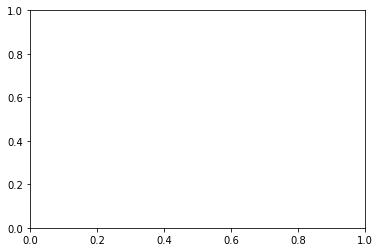

In [37]:
plot = stdSD.plot.bar()
plot.set(xlabel = "Quintile of Centrality to City Center", ylabel = "Standard Deviation of Return, 1990-2021", 
        title = "San Diego, CA")
plot.get_figure().savefig("distance-std-sd.png")

plot.cla() 

## h

In [39]:
Sharpe_r=gradientSD/stdSD
Sharpe_r

quintile
1    0.499817
2    0.501913
3    0.493753
4    0.482413
5    0.440061
Name: annual_change, dtype: float64

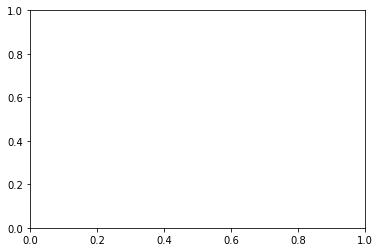

In [40]:
plot = Sharpe_r.plot.bar()
plot.set(xlabel = "Quintile of Centrality to City Center", ylabel = "Sharpe Ratio, 1990-2021", 
        title = "San Diego, CA")
plot.get_figure().savefig("distance-Sharpe_r-sd.png")

plot.cla() 